# Canada CO2 Emissions
### Lasso Regression vs Ridge Regression vs XGboost Regressor
- Source: Fuel Consumption Ratings - https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
- Modified / Edited by: Edy Blau
- Date: 12/11/2024

This dataset contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

#### Upload the .csv file

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the DataFrame
df = pd.read_csv('datasets/FuelConsumptionCo2.csv')

df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
1,2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
2,2024,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,6
3,2024,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2024,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


#### Basic Info and description of DataFrame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            768 non-null    int64  
 1   Make                  768 non-null    object 
 2   Model                 768 non-null    object 
 3   Vehicle class         768 non-null    object 
 4   Engine size (L)       768 non-null    float64
 5   Cylinders             768 non-null    int64  
 6   Transmission          768 non-null    object 
 7   Fuel type             768 non-null    object 
 8   City (L/100 km)       768 non-null    float64
 9   Highway (L/100 km)    768 non-null    float64
 10  Combined (L/100 km)   768 non-null    float64
 11  Combined (mpg)        768 non-null    int64  
 12  CO2 emissions (g/km)  768 non-null    int64  
 13  CO2 rating            768 non-null    int64  
 14  Smog rating           768 non-null    int64  
dtypes: float64(4), int64(6)

In [4]:
df.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,768.0,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,2024.0,3.086198,5.541667,12.410417,9.432552,11.071224,27.332031,259.190104,4.479167,5.497396
std,0.0,1.268500,1.891678,3.392118,2.303873,2.845196,7.710060,64.902216,1.304723,1.607510
min,2024.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2024.0,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,210.000000,4.000000,5.000000
50%,2024.0,3.000000,6.000000,12.250000,9.300000,11.000000,26.000000,260.000000,4.000000,6.000000
75%,2024.0,3.600000,6.000000,14.500000,10.825000,12.800000,31.000000,299.000000,5.000000,7.000000
max,2024.0,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,8.000000,8.000000


In [5]:
df.shape

(768, 15)

#### Feature Selection

In [6]:
# We will select some features for regression
sub_df = df[['Engine size (L)', 'Cylinders', 'City (L/100 km)', 'Highway (L/100 km)', 'Combined (L/100 km)', 'CO2 emissions (g/km)']]
sub_df.head(10)

,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),CO2 emissions (g/km)
0,1.5,4,8.1,6.5,7.4,172
1,1.5,4,8.9,6.5,7.8,181
2,2.0,4,11.1,8.3,9.9,230
3,3.5,6,12.6,9.4,11.2,263
4,3.0,6,13.8,11.2,12.4,291
5,2.0,4,11.0,8.6,9.9,232
6,2.0,4,11.3,9.1,10.3,241
7,2.0,4,10.0,7.2,8.7,205
8,2.0,4,10.5,7.7,9.2,217
9,2.9,6,13.5,9.3,11.6,271


### EDA

Text(0, 0.5, 'CO2 Emissions (g/km)')

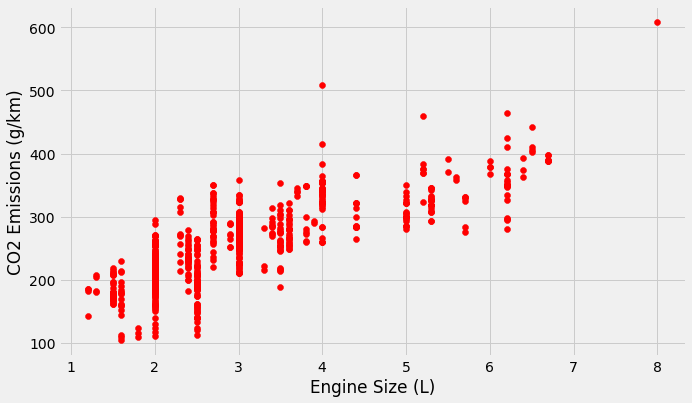

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plt.scatter(sub_df['Engine size (L)'], sub_df['CO2 emissions (g/km)'], color='red')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')

Text(0, 0.5, 'CO2 Emissions (g/km)')

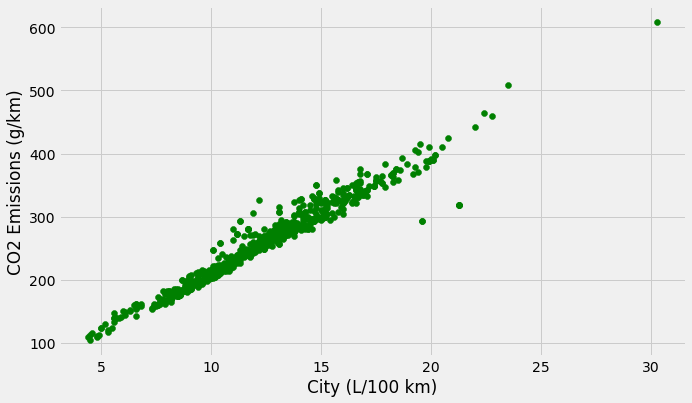

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(sub_df['City (L/100 km)'], sub_df['CO2 emissions (g/km)'], color='green')
plt.xlabel('City (L/100 km)')
plt.ylabel('CO2 Emissions (g/km)')

According to the visualizations, There could be an outlier in CO2 emissions around 600g/Km. Let's see that value:

In [9]:
sub_df[sub_df['CO2 emissions (g/km)'] > 600]

,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),CO2 emissions (g/km)
111,8.0,16,30.3,20.9,26.1,608


The exact value for that data point is `608 CO2 emissions (g/km)`.

Although this could be obvious, to determine if this really represents an _Outlier_, we will perform an analysis based on __Inter-Quartile Range (IQR)__.

$$
\text{IQR} = Q_3 - Q_1
$$

The lower and upper limits to identify _outliers_ are:

$$
\text{Lower Limit} = Q_1 - 1.5 \cdot \text{IQR}
$$

$$
\text{Upper Limit} = Q_1 + 1.5 \cdot \text{IQR}
$$

In [10]:
Q1 = df['CO2 emissions (g/km)'].quantile(0.25)
Q3 = df['CO2 emissions (g/km)'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q1 + 1.5 * IQR

print(f"Lower Bound: {lower_limit}, Upper Bound: {upper_limit}")

# Identify if 608 is an outlier
is_outlier = 608 > upper_limit or 608 < lower_limit
print(f'Is 608 CO2 Emissions (g/Km) an outlier? {is_outlier}')

Lower Bound: 76.5, Upper Bound: 343.5
Is 608 CO2 Emissions (g/Km) an outlier? True


And using a BoxPlot:

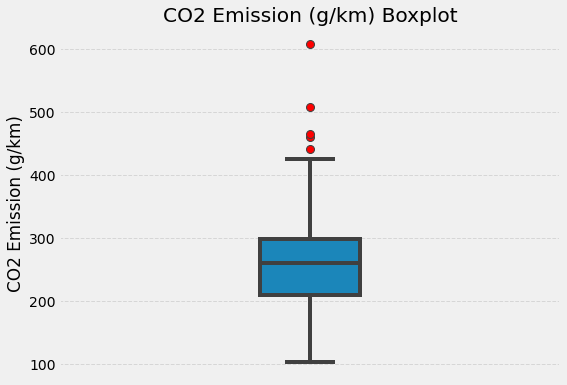

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(
    y=df['CO2 emissions (g/km)'],
    width=0.2,
    flierprops={'marker':'o', 'markerfacecolor':'red', 'markersize':8}
)
plt.title('CO2 Emission (g/km) Boxplot')
plt.ylabel('CO2 Emission (g/km)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

Although there are more statistical outliers (above 420 aprox.), for the purposes of this example, we'll only remove the `608` CO2 Emission outlier.

In [12]:
sub_df_cleaned = sub_df[sub_df['CO2 emissions (g/km)'] < 600]
print('Shape of df with 608 CO2 emission data point', sub_df.shape)
print('Shape of df without these outlier', sub_df_cleaned.shape)

Shape of df with 608 CO2 emission data point (768, 6)
Shape of df without these outlier (767, 6)


#### Train/Test Split

In [13]:
# Defining X and y
X = sub_df_cleaned.drop('CO2 emissions (g/km)', axis=1)
y = sub_df_cleaned['CO2 emissions (g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Machine Learning Models and Pipelines

In [14]:
# Pipelines dictionary
# Note: For Ridge and Lasso Regression, the features are standardized with StandardScaler. For XGboost, this is not necessary.

# Dictionary of pipelines
pipelines = {
    'Lasso': Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso(alpha=0.1))
    ]),
    'Ridge': Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=1.0))
    ]),
    'XGBoost': Pipeline([
        ('xgb', XGBRegressor(n_estimators=100, max_depth=3, random_state=42))
    ])
}

# Dictionary to save the results
results = {}

# Training and evaluation
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Performance evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R2': r2}

print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"\tMSE: {metrics['MSE']:.5f} ")
    print(f"\tR²: {metrics['R2']:.5f}")

Model Performance:
Lasso:
	MSE: 105.60690 
	R²: 0.97039
Ridge:
	MSE: 106.41886 
	R²: 0.97017
XGBoost:
	MSE: 30.79062 
	R²: 0.99137


According to the above results. The best model is the `XGBoost`, which has:
- __MSE:__ 30.7906
- __R2:__ 0.99

With a higher performance than Lasso and Ridge Regressions.